<a href="https://colab.research.google.com/github/bd1923-ship-it/basic1.5/blob/main/task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Employee_Performance_Retention.csv to Employee_Performance_Retention.csv


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

df = pd.read_csv("Employee_Performance_Retention.csv")


print(df.head())
print(df.info())

label_enc = LabelEncoder()
df['Department'] = label_enc.fit_transform(df['Department'])
df['Job_Satisfaction_Level'] = label_enc.fit_transform(df['Job_Satisfaction_Level'])
df['Attrition'] = df['Attrition'].map({'Yes':1, 'No':0})
df['Promotion_in_Last_2_Years'] = df['Promotion_in_Last_2_Years'].map({'Yes':1, 'No':0})


X = df.drop(['Employee_ID','Attrition'], axis=1)
y = df['Attrition']

scaler = StandardScaler()
X = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  Employee_ID  Age  Department  Years_of_Experience  Monthly_Working_Hours  \
0       E1000   59       Sales                   27                    135   
1       E1001   49        Tech                   13                    132   
2       E1002   35  Operations                   16                    197   
3       E1003   28          HR                   23                    204   
4       E1004   41  Operations                   33                    192   

   Training_Hours_per_Year  Performance_Rating Job_Satisfaction_Level  \
0                       30                   3                 Medium   
1                       36                   5                 Medium   
2                       11                   5                    Low   
3                       36                   3                   High   
4                       36                   2                 Medium   

  Promotion_in_Last_2_Years Attrition  
0                       Yes        No  
1           

Random Forest Results
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1446
           1       0.40      0.01      0.01       354

    accuracy                           0.80      1800
   macro avg       0.60      0.50      0.45      1800
weighted avg       0.72      0.80      0.72      1800

Accuracy: 0.8027777777777778


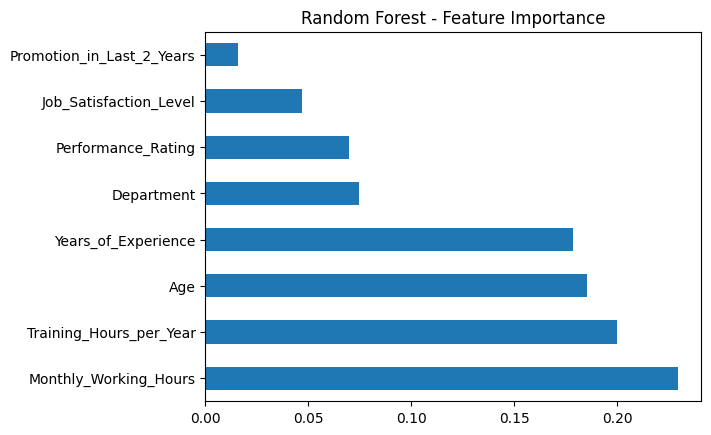

In [6]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Results")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

# Feature importance
feat_imp = pd.Series(rf.feature_importances_, index=df.drop(['Employee_ID','Attrition'], axis=1).columns)
feat_imp.nlargest(10).plot(kind='barh')
plt.title("Random Forest - Feature Importance")
plt.show()


In [7]:
kernels = ['linear', 'poly', 'rbf']
for k in kernels:
    svm = SVC(kernel=k, probability=True, random_state=42)
    svm.fit(X_train, y_train)
    y_pred_svm = svm.predict(X_test)
    print(f"\nSVM ({k} kernel) Results")
    print(classification_report(y_test, y_pred_svm))
    print("Accuracy:", accuracy_score(y_test, y_pred_svm))



SVM (linear kernel) Results
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1446
           1       0.00      0.00      0.00       354

    accuracy                           0.80      1800
   macro avg       0.40      0.50      0.45      1800
weighted avg       0.65      0.80      0.72      1800

Accuracy: 0.8033333333333333


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



SVM (poly kernel) Results
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1446
           1       0.00      0.00      0.00       354

    accuracy                           0.80      1800
   macro avg       0.40      0.50      0.45      1800
weighted avg       0.65      0.80      0.72      1800

Accuracy: 0.8033333333333333


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



SVM (rbf kernel) Results
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1446
           1       0.00      0.00      0.00       354

    accuracy                           0.80      1800
   macro avg       0.40      0.50      0.45      1800
weighted avg       0.65      0.80      0.72      1800

Accuracy: 0.8033333333333333


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


XGBoost Results
              precision    recall  f1-score   support

           0       0.80      0.96      0.87      1446
           1       0.15      0.03      0.05       354

    accuracy                           0.78      1800
   macro avg       0.48      0.49      0.46      1800
weighted avg       0.67      0.78      0.71      1800

Accuracy: 0.7761111111111111


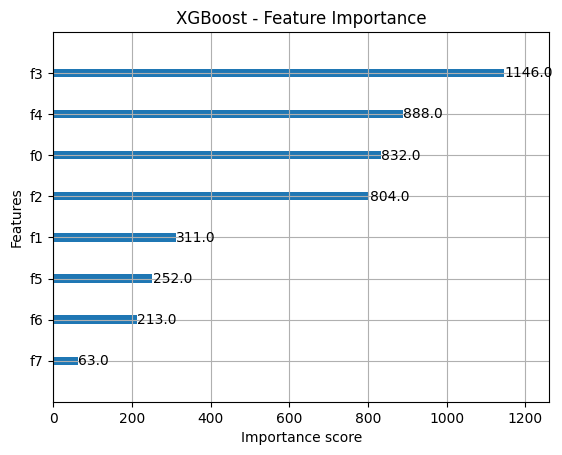

In [13]:
from xgboost import plot_importance, XGBClassifier

xgb = XGBClassifier(eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost Results")
print(classification_report(y_test, y_pred_xgb))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))

# Feature importance
plot_importance(xgb, max_num_features=10)
plt.title("XGBoost - Feature Importance")
plt.show()

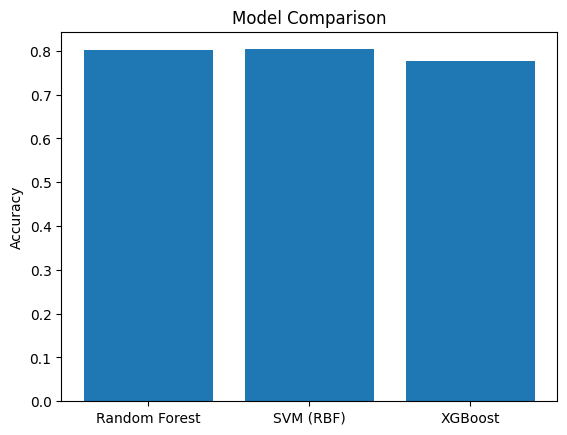

In [14]:
models = {
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "SVM (RBF)": accuracy_score(y_test, y_pred_svm),
    "XGBoost": accuracy_score(y_test, y_pred_xgb)
}

plt.bar(models.keys(), models.values())
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.show()


# New Section